OPTIMIZE THE MODEL

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#  Import and read the charity_data.csv.
import pandas as pd
mental_df = pd.read_csv("student_mental_health.csv")
mental_df.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
# Rename the columns
mental_df.columns = ['Timestamp','Gender','Age','Course','Year_of_Study','CGPA','Marital_Status','Depression','Anxiety','Panic_Atack','Treatment']

In [ ]:
# Display data with new header names
mental_df.head(2)

,Timestamp,Gender,Age,Course,Year_of_Study,CGPA,Marital_Status,Depression,Anxiety,Panic_Atack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No


In [ ]:
# Determine the number of ubique variables
mental_df.nunique()

Timestamp         92
Gender             2
Age                7
Course            49
Year_of_Study      7
CGPA               6
Marital_Status     2
Depression         2
Anxiety            2
Panic_Atack        2
Treatment          2
dtype: int64

Data Processing

In [ ]:
mental_df['Age'].fillna(mental_df['Age'].median(),inplace=True)

In [ ]:
mental_df['Year_of_Study'] = mental_df['Year_of_Study'].astype(str).str.extract('(\d+)').astype(int)

In [ ]:
mental_df['Timestamp'] = pd.to_datetime(mental_df['Timestamp'])

In [ ]:
def calculate_cgpa(x):
    if isinstance(x,str):
        first,second=x.split('-')
        return (float(first.strip())+float(second.strip()))/2
    else:
        return x
mental_df['CGPA']=mental_df['CGPA'].apply(calculate_cgpa)

In [ ]:
le=LabelEncoder()
cat_cols=['Gender','Marital_Status','Depression','Anxiety','Panic_Atack','Treatment']

for col in cat_cols:
    mental_df[col]=le.fit_transform(mental_df[col])
mental_df

,Timestamp,Gender,Age,Course,Year_of_Study,CGPA,Marital_Status,Depression,Anxiety,Panic_Atack,Treatment
0,2020-08-07 12:02:00,0,18.0,Engineering,1,3.245,0,1,0,1,0
1,2020-08-07 12:04:00,1,21.0,Islamic education,2,3.245,0,0,1,0,0
2,2020-08-07 12:05:00,1,19.0,BIT,1,3.245,0,1,1,1,0
3,2020-08-07 12:06:00,0,22.0,Laws,3,3.245,1,1,0,0,0
4,2020-08-07 12:13:00,1,23.0,Mathemathics,4,3.245,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,0,21.0,BCS,1,3.750,0,0,1,0,0
97,2020-07-13 21:21:42,1,18.0,Engineering,2,3.245,0,1,1,0,0
98,2020-07-13 21:22:56,0,19.0,Nursing,3,3.750,1,1,0,1,0
99,2020-07-13 21:23:57,0,23.0,Pendidikan Islam,4,3.750,0,0,0,0,0


Text(0.5, 1.0, 'CGPA Distribution')

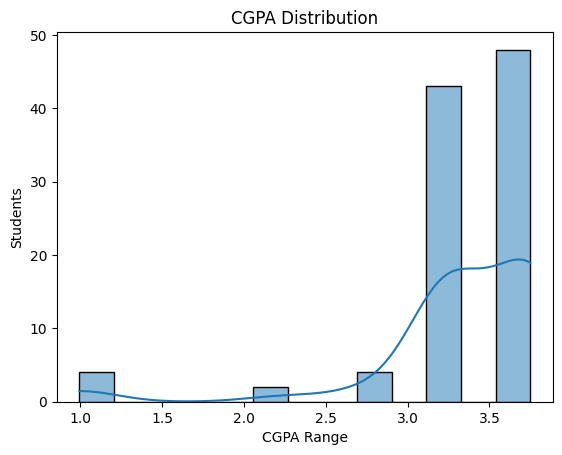

In [ ]:
sns.histplot(mental_df["CGPA"].sort_values(), kde = True)
plt.xlabel("CGPA Range")
plt.ylabel("Students")
plt.title("CGPA Distribution")

In [ ]:
# Drop Timestamp and Course- this will have no impact on the model
mental_clean_df = mental_df.drop(columns={"Timestamp", "Course"})
mental_clean_df.head(2)

,Gender,Age,Year_of_Study,CGPA,Marital_Status,Depression,Anxiety,Panic_Atack,Treatment
0,0,18.0,1,3.245,0,1,0,1,0
1,1,21.0,2,3.245,0,0,1,0,0


In [ ]:
# Split our preprocessed data into our features and target arrays
x = mental_clean_df.drop(columns=['Depression']).values
y = mental_clean_df['Depression'].values


In [ ]:
x[0]

array([ 0.   , 18.   ,  1.   ,  3.245,  0.   ,  0.   ,  1.   ,  0.   ])

In [ ]:
# split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
print(x_train_scaled[0])

[-0.62360956  1.41105873  1.88737007 -0.14582004 -0.43643578  1.45773797
 -0.70710678 -0.26726124]


In [ ]:
# Create a keras sequentila model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add first dense layer including the input layer (hidden layer)
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim =8))

In [ ]:
# Add second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="sigmoid"))

In [ ]:
# Add the third hidden layer
nn_model.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

In [ ]:
# Add output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4251 (16.61 KB)
Trainable params: 4251 (16.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn_model.fit(x_train_scaled, y_train, epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 7ms/step - loss: 0.7040 - accuracy: 0.6000
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6954 - accuracy: 0.6000
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.6000
Epoch 4/200
3/3 [==============================] - 0s 6ms/step - loss: 0.6817 - accuracy: 0.6000
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.6000
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.6000
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6591 - accuracy: 0.6000
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6561 - accuracy: 0.6000
Epoch 11/200
3/3 [===========

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.6008 - accuracy: 0.8077 - 243ms/epoch - 243ms/step
Loss: 0.6008489727973938, Accuracy: 0.807692289352417


USE A RANDOM FOREST CLASSIFIER ON THE DATASET

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a random forest classifier.
rfc = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rfc = rfc.fit(x_train_scaled, y_train)

# Evaluate the model
y_predicted = rfc.predict(x_test_scaled)
print(f'Random Forest accuracy: {accuracy_score(y_test, y_predicted)*100:.2f}')

Random Forest accuracy: 84.62
